![](growmore-removebg-preview-600x245.png)

# Author: Vedang Sawant

## Task-1: Iris flowers classification ML project

#### Importing required libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading the data
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data contains 149 entries in each of the 5 columns without any missing observation.

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Observation:
1.Average length of sepals is 5.843333cm.\
2.Average width of sepals is 3.054000cm.\
3.Average length of petals is 3.758667cm.\
4.Average width of petals is 1.198667cm.






### Checking for outlier

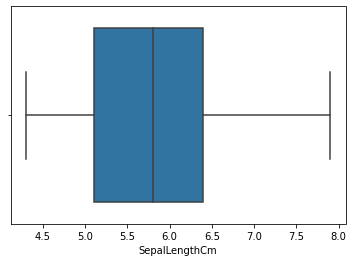

In [5]:
sb.boxplot(iris['SepalLengthCm']);

No outlier is present in SepalLengthCm

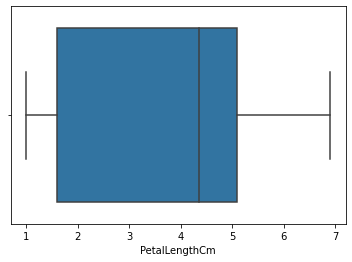

In [6]:
sb.boxplot(iris['PetalLengthCm']);

No outlier is present in PetalLengthCm

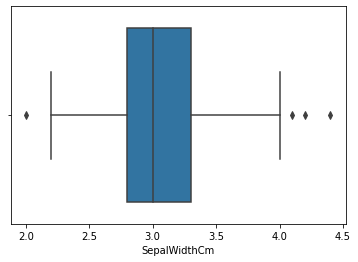

In [7]:
sb.boxplot(iris['SepalWidthCm']);

We got 4 outliers in SepalWidthCm.

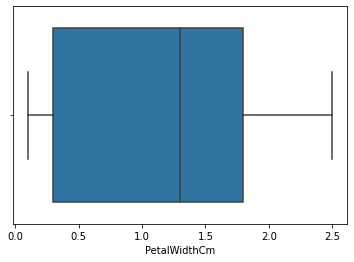

In [8]:
sb.boxplot(iris['PetalWidthCm']);

No outlier present in PetalWidthCm

### Dealing with outliers by using imputation

In [9]:
minimum_width=iris['SepalWidthCm'].min()
maximum_width=iris['SepalWidthCm'].max()

In [10]:
print("Minimum sepal width is",minimum_width,"cm")
print("Maximum sepal width is",maximum_width,"cm")

Minimum sepal width is 2.0 cm
Maximum sepal width is 4.4 cm


In [11]:
#Finding 1st & 3rd quartiles and IQR
Q3=iris['SepalWidthCm'].quantile(.75)
Q1=iris['SepalWidthCm'].quantile(.25)
IQR=Q3-Q1

In [12]:
#Setting upper & lower limit
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

Defining an imputer function which will replace the outliers values with upper limit & lower limit values.

In [13]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [14]:
iris['SepalWidthCm']=iris['SepalWidthCm'].apply(limit_imputer)

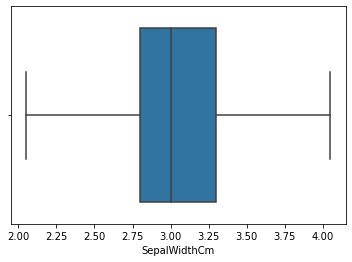

In [15]:
sb.boxplot(iris['SepalWidthCm']);

Now there are no outliers present in SepalWidthCm feature.

### Since our data is skewed we will normalize it using preprocessing

In [16]:
X=iris.iloc[:,:4]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [17]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-1.72054204, -0.90068117,  1.06572221, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.12017046, -1.3412724 ],
       [-1.67435299, -1.38535265,  0.35418661, -1.39813811],
       [-1.65125846, -1.50652052,  0.11700808, -1.2844067 ]])

In [18]:
y=iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=1)


## Training model by using k nearest neighbors 

In [20]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediction for test data

In [21]:
y_pred=knnmodel.predict(X_test)
y_pred[:10]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

## Evaluating model accuracy

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9733333333333334

The above model which is trained have 0.973333 accuracy.

## Finding value of K nearest neighbors

C:\Users\VEDANG SAWANT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VEDANG SAWANT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


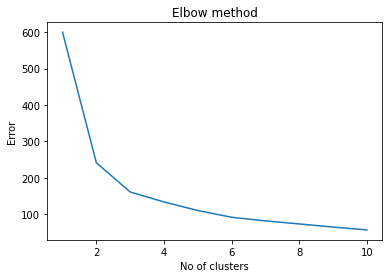

In [23]:
from sklearn.cluster import KMeans

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show;

We can observe by elbow method there are 3 nearest neighbors.